# Mock exam paper - solutions

## Question 1


### (a) **definition of a Normal form game**:

An \\(N\\) player normal form game consists of:

- A finite set of $N$ players
- Strategy spaces for the players: $\{S_1,S_2,S_3,\dots,S_N\}$;
- Payoff functions for the players: $u_i:S_1\times S_2\dots\times S_N\to\mathbb{R}$

[2]

### (b) **utilities of strategies**

(i) $$\sigma_r A \sigma_c = 1\qquad \sigma_r B \sigma_c = 1$$ [1]

(ii) $$\sigma_r A \sigma_c = 3/2\qquad \sigma_r B \sigma_c = 5/3$$ [1]

(iii) $$\sigma_r A \sigma_c = 7/4\qquad \sigma_r B \sigma_c = 5/2$$ [1]

Some code to verify:

In [1]:
import numpy as np
A, B = np.array([[3, 1], [0, 2]]), np.array([[2, 1], [0, 3]])
strategies = [(np.array([1, 0]), np.array([0, 1])), 
              (np.array([1/2, 1/2]), np.array([1/3, 2/3])),
              (np.array([1/4, 3/4]), np.array([0, 1]))]
for sigma_r, sigma_c in strategies:
    print(np.dot(sigma_r, np.dot(A, sigma_c)), np.dot(sigma_r, np.dot(B, sigma_c)))

1 1
1.5 1.66666666667
1.75 2.5


### (c)  **define LH**

For a nondegenerate 2 player game $(A, B)\in{\mathbb{R}^{m\times n}_{>0}}^2$ the following algorithm returns all nash equilibria:

1. Start at the artificial equilibrium: $(0, 0)$ [1]
2. Choose a label to drop. [1]
3. Remove this label from the corresponding vertex by traversing an edge of the corresponding polytope to another vertex. [1]
4. The new vertex will now have a duplicate label in the other polytope. Remove this label from the vertex of the other polytope and traverse an edge of that polytope to another vertex. [1]
5. Repeat step 4 until the pair of vertices is fully labelled. [1]

### (d) **obtain best response polytopes**

We start by scaling $A, B$:

$$
A \to A + 1 = \begin{pmatrix}4&2\\1&3\end{pmatrix} \qquad B \to B + 1 =\begin{pmatrix}3&2\\1&4\end{pmatrix}
$$

The row player best response polytope $\mathcal{P}$ is defined by $x\geq0, xB\leq 1$:

$$
x_1 \geq 0\\
x_2 \geq 0\\
3x_1+x_2 \leq 1\\
2x_1+4x_2 \leq 1
$$

which corresponds to:

$$
x_1 \geq 0\\
x_2 \geq 0\\
x_2 \leq 1 - 3x_1\\
x_2 \leq 1/4-1/2x_1
$$

[1]

The vertices (and their corresponding labels) are then given by:

- $a=(0, 0)$ with labels: $\{0, 1\}$
- $b=(1/3, 0)$ with labels: $\{1, 2\}$
- $c=(0, 1/4)$ with labels: $\{0, 3\}$
- $d=(3/10, 1/10)$ with labels: $\{2, 3\}$

[1]

The column player best response polytope $\mathcal{Q}$ is defined by $Ax\leq 1, x\geq0$:

$$
4x_1+2x_2 \leq 1\\
x_1+3x_2 \leq 1\\
x_1 \geq 0\\
x_2 \geq 0\\
$$

which corresponds to:

$$
x_2 \leq 1/2 - 2x_1\\
x_2 \leq 1/3-1/3x_1\\
x_1 \geq 0\\
x_2 \geq 0
$$

[1]

The vertices (and their corresponding labels) are then given by:

- $w=(0, 0)$ with labels: $\{2, 3\}$
- $x=(1/4, 0)$ with labels: $\{0, 3\}$
- $y=(0, 1/3)$ with labels: $\{1, 2\}$
- $z=(1/10, 3/10)$ with labels: $\{0, 1\}$

[1]

### (e) Drawing the best response polytope

[1] mark for each polytope.

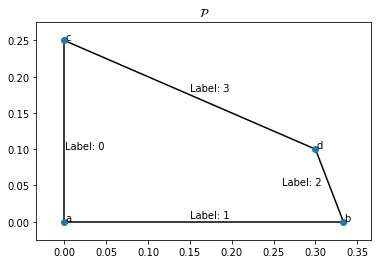

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial

V = [np.array([0, 0]), np.array([1 / 3, 0]), np.array([0, 1 / 4]), np.array([3/10, 1/10])]
P = scipy.spatial.ConvexHull(V)
scipy.spatial.convex_hull_plot_2d(P)
plt.title("$\mathcal{P}$")
plt.text(0.001, .1, "Label: 0")
plt.text(0.15, .005, "Label: 1")
plt.text(0.15, .18, "Label: 3")
plt.text(0.26, .05, "Label: 2")
for v, s in zip(V, "abcd"):
    plt.text(v[0] + 0.001, v[1] + 0.001, s);

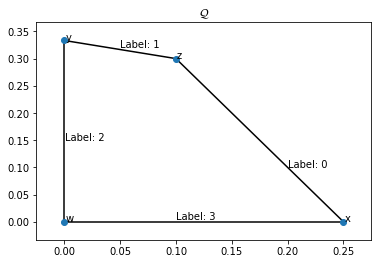

In [3]:
V = [np.array([0, 0]), np.array([1 / 4, 0]), np.array([0, 1 / 3]), np.array([1/10, 3/10])]
Q = scipy.spatial.ConvexHull(V)
scipy.spatial.convex_hull_plot_2d(Q)
plt.title("$\mathcal{Q}$")
plt.text(0.001, .15, "Label: 2")
plt.text(0.10, .005, "Label: 3")
plt.text(0.05, .32, "Label: 1")
plt.text(0.2, .1, "Label: 0")
for v, s in zip(V, "wxyz"):
    plt.text(v[0] + 0.001, v[1] + 0.001, s);

### (f) Carrying out the LH algorithm

Using the plot we can carry out the Lemke-Howson algorithm:

- Dropping label 0:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 0.
  - $\to (b, w)$ have labels $\{1, 2\}, \{2, 3\}$. In $\mathcal{Q}$ drop 2.
  - $\to (b, x)$ have labels $\{1, 2\}, \{0, 3\}$. Fully labeled vertex pair.

- Dropping label 1:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 1.
  - $\to (c, w)$ have labels $\{0, 3\}, \{2, 3\}$. In $\mathcal{Q}$ drop 3.
  - $\to (c, y)$ have labels $\{0, 3\}, \{1, 2\}$. Fully labeled vertex pair.
  
- Dropping label 2:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 2.
  - $\to (a, x)$ have labels $\{0, 1\}, \{0, 3\}$. In $\mathcal{P}$ drop 0.
  - $\to (b, x)$ have labels $\{1, 2\}, \{0, 3\}$. Fully labeled vertex pair.

- Dropping label 3:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 3.
  - $\to (a, y)$ have labels $\{0, 1\}, \{1, 2\}$. In $\mathcal{P}$ drop 1.
  - $\to (c, y)$ have labels $\{0, 3\}, \{1, 2\}$. Fully labeled vertex pair.
  
  [2]
  
We see that we have obtained two equilibria:
  
$$(b, x) = ((1/3, 0), (1/4, 0))$$

$$(c, y) = ((0, 1/4), (0, 1/3))$$

which gives the following two Nash equilibria:

$$((1, 0), (1, 0))$$

$$((0, 1), (0, 1))$$

[2]

Some code to verify:

In [4]:
import nashpy as nash
A, B = np.array([[3, 1], [0, 2]]), np.array([[2, 1], [0, 3]])
game = nash.Game(A, B)
for label, eq in enumerate(game.lemke_howson_enumeration()):
    print(label, eq)

0 (array([ 1.,  0.]), array([ 1.,  0.]))
1 (array([ 0.,  1.]), array([ 0.,  1.]))
2 (array([ 1.,  0.]), array([ 1.,  0.]))
3 (array([ 0.,  1.]), array([ 0.,  1.]))


### (g)  **Using a different initial vertex pair**

- $(b, x)$ has labels $\{1, 2\}, \{0, 3\}$. Drop 3.
- $\to (b, z)$ have labels $\{1, 2\}, \{0, 1\}$. In $\mathcal{P}$ drop 1.
- $\to (d, y)$ have labels $\{2, 3\}, \{0, 1\}$. Fully labeled vertex pair.

[1]

This gives the Nash equilibria:

$$
((3/4, 1/4), (1/4, 3/4))
$$

some code to verify the result:

In [5]:
list(game.vertex_enumeration())

[(array([ 1.,  0.]), array([ 1.,  0.])),
 (array([ 0.,  1.]), array([ 0.,  1.])),
 (array([ 0.75,  0.25]), array([ 0.25,  0.75]))]

### (h) Sketch of proof

- We know that there is a path between $(0, 0)$ and a fully labelled vertex pair. [1]
- Similarly, from a fully labelled vertex pair we can assume that it's possible to drop another fully labelled vertex pairs. [1]
- We can construct a graph of pairs of fully labelled vertex pairs. [1]
- As we have pairs this corresponds to an even number of fully labelled vertex pairs. Removing $(0, 0)$ this implies there is an odd number of Nash equilibria. [1]

## Question 2

### (a) Definition of a Prisoner's Dilemma (bookwork)

$$
A =
\begin{pmatrix}
    R & S\\
    T & P
\end{pmatrix}\qquad
B =
\begin{pmatrix}
    R & T\\
    S & P
\end{pmatrix}
$$

with the following constraints:

$$T > R > P > S$$
$$2R > T + S$$

[2]

### (b) Finding valid Prisoner's Dilemmas

(i) 

For $A, B$ to be valid we need:

$$
\begin{pmatrix}
    3 & S\\
    5 & 1
\end{pmatrix}
=
\begin{pmatrix}
    R & S\\
    T & P
\end{pmatrix}
$$

which gives: $R=3, T=5, P=1$

further more:

$$
\begin{pmatrix}
    3 & T\\
    -1 & 1
\end{pmatrix}
=
\begin{pmatrix}
    R & T\\
    S & P
\end{pmatrix}
$$

[2]

which gives: $R=3, S=-1, P=1$

Thus we have (R, S, P, T) = (3, -1, 1, 5) which also follows the two required inequalities:

$$T > R > P > S \Leftrightarrow 5 > 3 > 1 > -1$$
$$2R > T + S \Leftrightarrow 6 > 4$$

[2]

(ii) 

For $A, B$ to be valid we need:

$$
\begin{pmatrix}
    2 & S\\
    -2 & 1
\end{pmatrix}
=
\begin{pmatrix}
    R & S\\
    T & P
\end{pmatrix}
$$

which gives: $R=2, T=-2, P=1$

We immediately see that $R > T$ so this cannot be a Prisoner's Dilemma.

[4]

### (c) Markov chain representation of a reactive player match

$$
M = \begin{pmatrix}
3/10 & 3/10 & 1/5 & 1/5\\
3/8 & 3/8 & 1/8 & 1/8\\
3/20 & 9/20 & 1/10 & 3/10\\
3/16 & 9/16 & 1/16 & 3/16\\
\end{pmatrix}
$$

### (d) Expected utility (bookwork)

The first player:

$$s_1s_2\times R +  s1(1-s_2) \times S +  (1-s_1)s_2 \times T + (1-s_1)(1-s_2)\times P$$

The second player:

$$s_1s_2\times R +  s1(1-s_2) \times T +  (1-s_1)s_2 \times S + (1-s_1)(1-s_2)\times P$$

where:

$$
s_1 = \frac{q_2r_1+p_2}{1-r_1r_2}\qquad s_2 = \frac{p_2r_2+q_2}{1-r_1r_2}
$$

for:

$$r_1=p_1-p_2\qquad r_2=q_1-q_2$$

### (e) Expected utility for specific type of player

We have:

$$r_1=x-x/2=x/2\qquad r_2=1/2-1/4=1/4$$

thus

$$
s_1 = \frac{1/4x/2+x/2}{1-x/8}=\frac{5x}{8-x}\qquad s_2 = \frac{1/4x/2+1/4}{1-x/8}=\frac{x+2}{8-x}
$$

Direct substitution gives:

$$\frac{5x(x+2)}{(8-x)^2}\times R 
  +  \frac{5x(6-2x)}{(8-x)^2} \times S 
  +  \frac{(8-6x)(x+2)}{(8-x)^2} \times T 
  +  \frac{(8-6x)(6-2x)}{(8-x)^2}\times P$$
  
expanding:

$$\frac{R\times(5x^2+10x) + S\times (35x-10x^2) + T\times (-6x^2+16-4x) + P\times (48-52x+12x^2)}{(8-x)^2}$$

substituting $(R, S, T, P)=(3, 0, 4, 1)$:

$$\frac{3x^2 - 38x + 112}{(8-x)^2}$$

factorising the $(8-x)$ term gives:

$$\frac{(8-x)(14-3x)}{(8-x)^2}=
\frac{\left(3 x-14\right)}{\left(x - 8\right)} 
$$



Some code to verify the calculations:

In [6]:
import sympy as sym
x, R, S, T, P = sym.symbols("x, R, S, T, P")

expr = R * (5 * x ** 2 + 10 * x) + S * (35 * x - 10 * x ** 2) + T * (-6 * x ** 2 + 16 - 4 * x) + P *(48 - 52 * x + 12 * x ** 2)

In [7]:
expr.subs({R:3, S:0, T:4, P:1}).factor()

(x - 8)*(3*x - 14)

In [8]:
import numpy as np

def theoretic_steady_state(p, q):
    r_1 = p[0] - p[1]
    r_2 = q[0] - q[1]
    s_1 = (q[1] * r_1 + p[1]) / (1 - r_1 * r_2)
    s_2 = (p[1] * r_2 + q[1]) / (1 - r_1 * r_2)
    return np.array([s_1 * s_2, s_1 * (1 - s_2), (1 - s_1) * s_2, (1 - s_1) * (1 - s_2)])

def theoretic_utility(p, q, rstp=np.array([3, 0, 5, 1])):
    pi = theoretic_steady_state(p, q)
    return np.dot(pi, rstp)

In [9]:
p = np.array([x, x / 2])
q = np.array([sym.S(1) / 2, sym.S(1) / 4])
expr = theoretic_utility(p=p, q=q, rstp=np.array([3, 0, 4, 1]))
sym.factor(expr) 

(3*x - 14)/(x - 8)

Here is a plot of the utility (calculated both ways)

**Note that this is not requested in the question: just here to help understanding.**

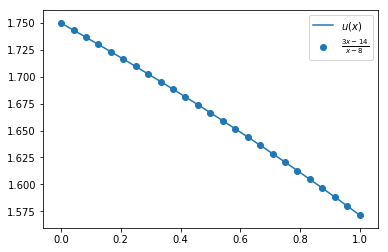

In [10]:
xs = np.linspace(0, 1, 25)
ys = [theoretic_utility(p=[x, x / 2], q=q, rstp=np.array([3, 0, 4, 1])) for x in xs]
simplified_ys = [(3 * x - 14) / (x - 8) for x in xs]
plt.plot(xs, ys, label="$u(x)$")
plt.scatter(xs, simplified_ys, label="$\\frac{3x-14}{x-8}$")
plt.legend();


### (f) Identifying the optimal behaviour

Direct differentiating gives:

$$
\frac{3x - 24 - (3x - 14)}{\left(x - 8\right)^2}=\frac{-10}{\left(x - 8\right)^{2}}
$$

[2]

simplifying gives the required result.

We see that our function is decreasing for all values of $x$ (it has negative derivative). Thus, the optimal value of $x$ is $0$.

[2]

In [11]:
sym.factor(expr.diff(x))

-10/(x - 8)**2

## Question 3

### (a) Defining equations (bookwork)

The matrix $A$ correspods to the utility of a row player in a game where the row player is a given individual and the column player is the population.

This gives:

$$f_1=ax_1+bx_2\qquad f_2=cx_1+dx_2$$

[1]

or equivalently:

$$f=Ax\qquad \phi=fx$$

thus we have the same equation as before but in matrix notation:

$$\frac{dx}{dt}=x(f-\phi)$$

[1]

### (b) Defining mutated population (bookwork)


Given a strategy vector $x=(x_1, x_2)$, some $\epsilon>0$ and another strategy $y=(y_1, y_1)$, the post entry population $x_{\epsilon}$ is given by:

$$
x_{\epsilon} = (x_1 + \epsilon(y_1 - x_1), x_2 + \epsilon(y_2 - x_2))
$$

[2]

### (c) Defining an evolutionary stable strategy (bookwork)

Given a stable population distribution, $x$ it represents an **Evolutionary Stable Strategy** (ESS) if and only if there exists $\bar\epsilon>0$:

$$u(x, x_{\epsilon})>u(y, x_{\epsilon})\text{ for all }0<\epsilon<\bar\epsilon, y$$

[1]

where $u(x, y)$ corresponds to the fitness of strategy $x$ in population $y$ which is given by:

$$xAy^T$$

[1]

### (d) Proof of result for ESS (bookwork)

**Theorem:**

If $x$ is an ESS, then for all $y\ne x$, either:

1. $u(x,x)>u(y,x)$
2. $u(x,x)=u(y,x)$ and $u(x,y)>u(y,y)$
---


Conversely, if either (1) or (2) holds for all $y\ne x$ then $x$ is an ESS.


[2]

---

**Proof:**

---

If $x$ is an ESS, then by definition:

$$u(x,x_{\epsilon})>u(y,x_{\epsilon})$$

which corresponds to:

$$(1-\epsilon)u(x,x)+\epsilon u(x,y)>(1-\epsilon)u(y,x)+\epsilon u(y,y)$$

- If condition 1 of the theorem holds then the above inequality can be satisfied for \\(\epsilon\\) sufficiently small. If condition 2 holds then the inequality is satisfied.
- Conversely:

    - If $u(x,x) < u(y,x)$ then we can find $\epsilon$ sufficiently small such that the inequality is violated. [1]

    - If $u(x, x) = u(y,x)$ and $u(x,y) \leq u(y,y)$ then the inequality is violated. [1]

### (e) Obtain all ESS for a 2 by 2 game

First step is to identify the Nash equilibria. Identify best responses for the associated two player game $(A, A^T)$:

$$
A=\begin{pmatrix}
1&\underline{4}\\
\underline{2}&1
\end{pmatrix}\qquad
A^T=\begin{pmatrix}
1&\underline{2}\\
\underline{4}&1
\end{pmatrix}
$$

[1]

This immediately gives 2 pure Nash equilibria, which are ESS from the theorem:

$$
(\sigma_r, \sigma_c) \in \{((1, 0), (0, 1)), ((0, 1), (1, 0))\}
$$


To find the remaining Nash equilibria, we use the support enumeration algorithm which gives:

$${\sigma_r}_1  + 4{\sigma_r}_2 = 2{\sigma_r}_1  + {\sigma_r}_2$$
$${\sigma_c}_1  + 4{\sigma_c}_2 = 2{\sigma_c}_1  + {\sigma_c}_2$$

This gives:

$$3{\sigma_r}_2  = {\sigma_r}_1$$

which gives, a final Nash equilibrium of:

$$x = (3/4, 1/4)$$

[2]

some code to verify this:

In [12]:
A = np.array([[1, 4], [2, 1]])
game = nash.Game(A, A.transpose())
list(game.support_enumeration())

[(array([ 1.,  0.]), array([ 0.,  1.])),
 (array([ 0.,  1.]), array([ 1.,  0.])),
 (array([ 0.75,  0.25]), array([ 0.75,  0.25]))]

Considering this final equilibria, we have:

$$u(x, x)=u(y, x)\text{ for all }y$$

Applying the theorem we thus consider:

$$
u(x, y)=(5/4)y_1 + (13/4)y_2=(5/4)y_1 + (13/4)(1-y_1)=-2y_1+13/4
$$

\begin{align}
u(y, y)&=y_1^2+4y_1y_2+2y_1y_2+y_2^2\\
       &=y_1^2+6y_1-6y_1^2+1 - 2y_1 + y_1^2\\
       &=1+4y_1-4y_1^2
\end{align}

Thus:

$$u(x, y) - u(y, y) = 4y_1^2 - 6y_1+9/4 = 4(y_1 - 3/4)^2$$

[2]

however $y_1\ne3/4$ thus $x=(3/4, 1/4)$ is an ESS.

### (f) Discussing the research paper

- (i) This paper looks at GT and cancer: it is a proof of concept sitting in literature that already exists on the subject. The main result is confirming intuitive understanding of proliferation/motility. Increased nutrients implies less motility. This is done in two ways: a theoretic game and a simulation. [3]
- (ii) The game matrix should in fact be: $\begin{pmatrix}b/2 & b - c\\ b & b - c / 2\end{pmatrix}$ [2]
- (iii) The theorem is used in the paper, although it is not done explicitly it is used to implictely describe the stability of the equilibria. [2]
- (iv) Another approach would be to use a Moran process. The main difference with the approach in the paper would be to use a Moran process. This would correspond to considering a finite population size as opposed to the infinite population model used. This would correspond more closely to the simulation model used in the paper. [3]

## Question 4

### (a) Definition of a Moran process on a game

Consider a matrix $A\in\mathbb{R}^{m\times n}$ representing a game with two strategies. 

$$
A=
\begin{pmatrix}
    a & b\\
    c & d
\end{pmatrix}
$$

The Moran process is as follows:

- At a given time step: all individuals play all other individuals.
- Obtain their fitness as given by the game.
- Randomly select an individual proportional to their fitness as an individual to be reproduced
- Uniformly select an individual to be replaced
- Proceed to the next time step.
- The process terminates when there is only one type of individual in the population.

### (b) Theorem

**Theorem: Fixation probabilities for the birth death process**

Given a birth death process as defined above, the fixation probability $x_i$ is given by:

$$x_i=\frac{1+\sum_{j=1}^{i-1}\prod_{k=1}^j\gamma_k}{1+\sum_{j=1}^{N-1}\prod_{k=1}^j\gamma_k}$$

where:

$$
\gamma_k = \frac{p_{k,k-1}}{p_{k,k+1}}
$$

**Proof**

We have:

\begin{align}
    p_{i,i+1}x_{i+1} & = -p_{i,i-1}x_{i-1} + x_i(1 - p_{ii}) \\ 
    p_{i,i+1}x_{i+1} & = p_{i,i-1}(x_{i} - x_{i-1}) + x_ip_{i,i+1} \\ 
    x_{i+1} - x_i    & = \frac{p_{i, i-1}}{p_{i, i+1}}(x_i-x_{i-1})=\gamma_i(x_i-x_{i-1})
\end{align}

We observe that:

\begin{align}
    x_2 - x_1 &= \gamma_1(x_1-x_{0})=\gamma_1x_1\\
    x_3 - x_2 &= \gamma_2(x_2-x_1)=\gamma_2\gamma_1x_1\\
    x_4 - x_3 &= \gamma_3(x_3-x_2)=\gamma_3\gamma_2\gamma_1x_1\\
              &\; \vdots & \\
    x_{i+1} - x_i &= \gamma_i(x_i-x_{i-1})=\prod_{k=1}^i\gamma_kx_1\\
               &\; \vdots & \\   
    x_{N} - x_{N-1} &= \gamma_{N-1}(x_{N-1}-x_{N-2})=\prod_{k=1}^{N-1}\gamma_kx_1\\
\end{align}

thus we have:

$$x_i=\sum_{j=0}^{i-1}x_{j+1}-x_j=\left(1+\sum_{j=1}^{i-1}\prod_{k=1}^j\gamma_k\right)x_1$$

we complete the proof by solving the following equation to obtain $x_1$:

$$x_N=1=\left(1+\sum_{j=1}^{N-1}\prod_{k=1}^j\gamma_k\right)x_1$$


### (c) Moran process for the game

Assuming $i$ individuals of the first type, for this game we have $N=5$ and $(a, b, c, d)=(4, 1, 6, 2)$ the fitness of both types is given respectively by:

$$f_{1i}=\frac{a(i-1)+b(N-i)}{N-1}=\frac{4i-4+5-i}{4}=\frac{3i+1}{4}$$
$$f_{2i}=\frac{c(i)+d(N-i-1)}{N-1}=\frac{6i+2(4-i)}{4}=\frac{4i+8}{4}=i$$

which gives:

$$\gamma_i=\frac{f_{2i}}{f_{1i}}=\frac{4i+8}{3i+1}$$

thus:

$$
x_1=\frac{1}{1+\sum_{j=1}^{4}\prod_{k=1}^j\frac{4k+8}{3k+1}}=\frac{1}{1+3+3(16/7)+3(16/7)2+3(16/7)2(24/13)}=\frac{91}{4540}
$$

$$
x_{4}=\frac{1+\sum_{j=1}^{3}\prod_{k=1}^j\frac{4k+8}{3k+1}}{1+\sum_{j=1}^{4}\prod_{k=1}^j\frac{4k+8}{3k+1}}=\frac{1+3+3(16/7)+3(16/7)2}{1+3+3(16/7)+3(16/7)2+3(16/7)2(24/13)}=\frac{559}{1135}
$$

Thus the two fixation probabilities $x_1$ are:


- Cooperation: $\frac{91}{4540}\approx 0.02$
- Defection $1-\frac{559}{1135}=\frac{576}{1135}\approx 0.51$

Some code to verify the result:

In [13]:
def theoretic_fixation(N, game, i=1):
    """
    Calculate x_i as given by the above formula
    """
    f_ones = np.array([(game[0, 0] * (i - 1) + game[0, 1] * (N - i)) / (N - 1) for i in range(1, N)])
    f_twos = np.array([(game[1, 0] * i + game[1, 1] * (N - i - 1)) / (N - 1) for i in range(1, N)])
    gammas = f_twos / f_ones
    return (1 + np.sum(np.cumprod(gammas[:i-1]))) / (1 + np.sum(np.cumprod(gammas)))

In [14]:
import sympy as sym
game = np.array([[sym.S(4), sym.S(1)], [sym.S(6), sym.S(2)]])
theoretic_fixation(N=5, game=game), 1- theoretic_fixation(N=5, game=game, i=4)

(91/4540, 576/1135)

In [15]:
[float(x) for x in _]

[0.020044052863436124, 0.507488986784141]

### (d) Game for TfT vs Alternator

The history of 5 turns would give between TfT and Alternator

1. TfT: C Alternator: C with scores: (4, 4)
2. TfT: C Alternator: D with scores: (1, 6)
3. TfT: D Alternator: C with scores: (6, 1)
4. TfT: C Alternator: D with scores: (1, 6)
5. TfT: D Alternator: C with scores: (6, 1)

The history of 5 turns would give between TfT and TfT

1. TfT: C TfT: C with scores: (4, 4)
2. TfT: C TfT: C with scores: (4, 4)
3. TfT: C TfT: C with scores: (4, 4)
4. TfT: C TfT: C with scores: (4, 4)
5. TfT: C TfT: C with scores: (4, 4)

The history of 5 turns between Alternator and Alternator:

1. Alternator: C Alternator: C with scores: (4, 4)
2. Alternator: D Alternator: D with scores: (2, 2)
3. Alternator: C Alternator: C with scores: (4, 4)
4. Alternator: D Alternator: D with scores: (2, 2)
5. Alternator: C Alternator: C with scores: (4, 4)

Summing these, the payoff matrix is thus given by:

$$
\begin{pmatrix}
20 & 18 \\
18 & 16\\
\end{pmatrix}
$$

### (e) Moran calculations

Repeating the previous calculations:

$$f_{1i}=\frac{a(i-1)+b(N-i)}{N-1}=\frac{20(i - 1) + 18(5-i)}{4}=\frac{2i+70}{4}$$
$$f_{2i}=\frac{c(i)+d(N-i-1)}{N-1}=\frac{18i+16(4-i)}{4}=\frac{2i+64}{4}=i$$

which gives:

$$\gamma_i=\frac{f_{2i}}{f_{1i}}=\frac{2i+64}{2i+70}$$

thus:

$$
x_1=\frac{1}{1+\sum_{j=1}^{4}\prod_{k=1}^j\frac{2k+64}{2k+70}}=\frac{1}{1+11/12+(11/12)(34/37)+(11/12)(34/37)(35/38)+(11/12)(34/37)(35/38)(12/13)}=\frac{247}{1050}
$$

$$
x_4=\frac{1+\sum_{j=1}^{3}\prod_{k=1}^j\frac{2k+64}{2k+70}}{1+\sum_{j=1}^{4}\prod_{k=1}^j\frac{2k+64}{2k+70}}=\frac{1+11/12+(11/12)(34/37)+(11/12)(34/37)(35/38)}{1+11/12+(11/12)(34/37)+(11/12)(34/37)(35/38)+(11/12)(34/37)(35/38)(12/13)}=\frac{923}{1110}
$$

Thus the two fixation probabilities $x_1$ are:

- TfT: $\frac{247}{1050}\approx 0.24$
- Alternator $1-\frac{923}{1110}=\frac{187}{1110}\approx 0.17$

Some code to verify the result:

In [16]:
game = np.array([[sym.S(20), sym.S(18)], [sym.S(18), sym.S(16)]])
theoretic_fixation(N=5, game=game), 1 - theoretic_fixation(N=5, game=game, i=4)

(247/1050, 187/1110)

In [17]:
[float(x) for x in _]

[0.23523809523809525, 0.16846846846846847]